<a href="https://colab.research.google.com/github/xdderekchen/ML/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logisitic Regression is the primary method to handle binary classification problems

## DataSet Preparation (Titanlic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


      Age     Fare  Survived  ...  Embarked_S  Sex_male  IsMinor
0    22.0   7.2500       0.0  ...           1         1        0
1    38.0  71.2833       1.0  ...           0         0        0
2    26.0   7.9250       1.0  ...           1         0        0
3    35.0  53.1000       1.0  ...           1         0        0
4    35.0   8.0500       0.0  ...           1         1        0
..    ...      ...       ...  ...         ...       ...      ...
886  27.0  13.0000       0.0  ...           1         1        0
887  19.0  30.0000       1.0  ...           1         0        0
888  28.0  23.4500       0.0  ...           1         0        0
889  26.0  30.0000       1.0  ...           0         1        0
890  32.0   7.7500       0.0  ...           0         1        0

[891 rows x 13 columns]


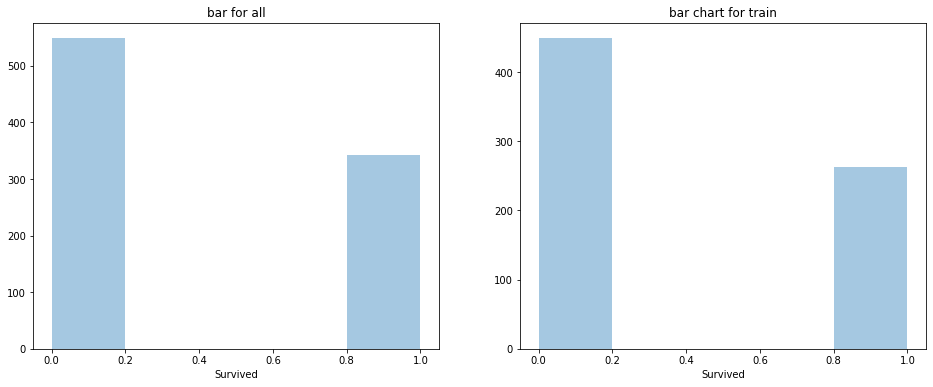

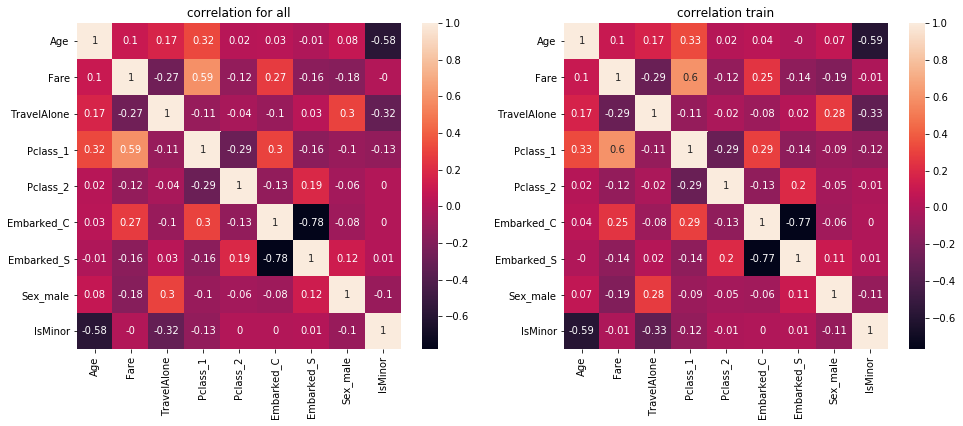

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

test_path = "/content/drive/My Drive/ML_Data/titanic_test.csv"
train_path  = "/content/drive/My Drive/ML_Data/titanic_train.csv"

#read in file
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df["isTrain"] = True
test_df["isTrain"] = False
ALL_df = pd.concat([train_df,test_df],ignore_index=True)

#fill-in missing values
NAV_Age = train_df["Age"].median(skipna=True)
NAV_Embarked = train_df['Embarked'].value_counts().idxmax()

ALL_df["Age"].fillna(NAV_Age, inplace=True)
ALL_df["Embarked"].fillna(NAV_Embarked, inplace=True)
ALL_df.drop('Cabin', axis=1, inplace=True)
## Create categorical variable for traveling alone
ALL_df['TravelAlone']=np.where((ALL_df["SibSp"]+ALL_df["Parch"])>0, 0, 1)
ALL_df.drop('SibSp', axis=1, inplace=True)
ALL_df.drop('Parch', axis=1, inplace=True)
ALL_df=pd.get_dummies(ALL_df, columns=["Pclass","Embarked","Sex"])
ALL_df.drop('Sex_female', axis=1, inplace=True)
ALL_df.drop('PassengerId', axis=1, inplace=True)
ALL_df.drop('Name', axis=1, inplace=True)
ALL_df.drop('Ticket', axis=1, inplace=True)
ALL_df['IsMinor']=np.where(ALL_df['Age']<=16, 1, 0)


train_df = ALL_df.query("isTrain == True")
test_df  = ALL_df.query("isTrain == False")
print(train_df)
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
# create X (features) and y (response)
X = train_df[Selected_features]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
usingScaler = 1

if usingScaler == 1:
   X_train_new  = scaler.fit_transform(X_train)
   X_test_new   = scaler.transform(X_test)
else:
   X_train_new = X_train
   X_test_new  = X_test


x_train = pd.DataFrame(X_train_new,  columns=X_train.columns)
x_test  = pd.DataFrame(X_test_new,   columns=X_test.columns)

x_train.head()

# Density 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
sns.distplot(y, kde =False, ax=ax1)
ax1.set_title('bar for all')
sns.distplot(y_train, kde =False, ax=ax2)
ax2.set_title('bar chart for train')
plt.show()

# Correlation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax1)
ax1.set_title('correlation for all')
correlation_matrix = x_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax2)
ax2.set_title("correlation train")
plt.show()


def print_coeff(model, x_train_columns):
  coefDataFrame = pd.DataFrame( zip( ["intecept"] +  list(x_train_columns), 
                                   list(model.intercept_) + list(model.coef_.flatten())),
                              columns=['feature', 'coef'])

  print("regression cooefficients:\n")
  print(coefDataFrame)


def evaluate_model(model, X_train=None, Y_train=None, X_test=None, Y_test=None):
  if (X_train is not None):
      y_pred          = model.predict(X_train)
      y_pred_proba    = model.predict_proba(X_train)
      if (y_pred_proba.shape[1]>1):
        y_pred_proba = y_pred_proba[:, 1]
      
      [fpr, tpr, thr] = roc_curve(Y_train, y_pred_proba)
      print("------   ", "On Training Dataset:")
      #print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_train, y_pred))
      print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_train, y_pred_proba))
      print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
  if (X_test is not None):
      y_pred          = model.predict(X_test)
      y_pred_proba    = model.predict_proba(X_test)
      if (y_pred_proba.shape[1]>1):
        y_pred_proba = y_pred_proba[:, 1]
      [fpr, tpr, thr] = roc_curve(Y_test, y_pred_proba)
      print("------   ", "On Testing Dataset:")
      #print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, y_pred))
      print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, y_pred_proba))
      print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


def show_performance(Y_actual, Y_pred, type="train", showROC=True):
    [fpr, tpr, thr] = roc_curve(Y_actual, Y_pred)
    print(">>> " + type + ":")
    print("     log_loss is %2.5f" % log_loss(Y_actual, Y_pred))
    print("     auc is %2.5f"      %  auc(fpr, tpr))
    if showROC:
       plt.figure()
       plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
       #plt.plot([0, 1], [0.5, 1], 'k--')
       plt.plot([0, 1], [0, 1], 'k--')
       #plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
       #plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
       plt.xlim([0.0, 1.0])
       plt.ylim([0.0, 1.05])
       plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
       plt.ylabel('True Positive Rate (recall)', fontsize=14)
       plt.title('Receiver operating characteristic (ROC) curve')
       plt.legend(loc="lower right")
       plt.show()



### By SVM

SVM:
>>> train:
     log_loss is 0.42261
     auc is 0.86271


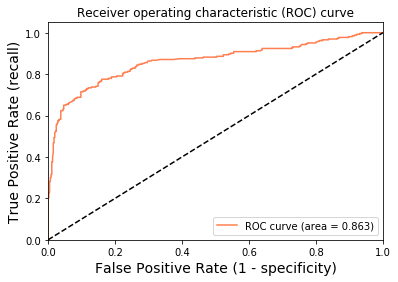

>>> test:
     log_loss is 0.49509
     auc is 0.82165


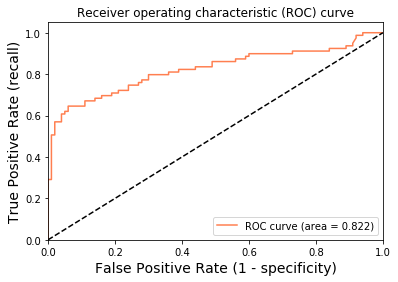

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


In [13]:
from sklearn.svm import SVC
def callSVM(showROC=True):
   mymodel = SVC(kernel='rbf', C=1, random_state=0, probability=True, gamma=0.05)
   mymodel.fit(x_train, y_train)
   
   #y_pred_train = mymodel.predict(X_train)
   y_pred_train_proba = mymodel.predict_proba(x_train)[:, 1]
   #y_pred_test = mymodel.predict(X_test)
   y_pred_test_proba = mymodel.predict_proba(x_test)[:, 1]
   print("SVM:")
   show_performance(y_train, y_pred_train_proba, "train", showROC)
   show_performance(y_test,  y_pred_test_proba,  "test", showROC)
   print(mymodel)

callSVM(showROC=True)

### By logisticRegression from sklearn

regression cooefficients:

       feature      coef
0     intecept -0.769603
1          Age -0.366380
2         Fare  0.038030
3  TravelAlone  0.038161
4     Pclass_1  1.003569
5     Pclass_2  0.584340
6   Embarked_C -0.026504
7   Embarked_S -0.250143
8     Sex_male -1.285406
9      IsMinor  0.196055
------    On Training Dataset:
LogisticRegression log_loss is 0.433
LogisticRegression auc is 0.862
------    On Testing Dataset:
LogisticRegression log_loss is 0.508
LogisticRegression auc is 0.840
>>> train:
     log_loss is 0.43312
     auc is 0.86163


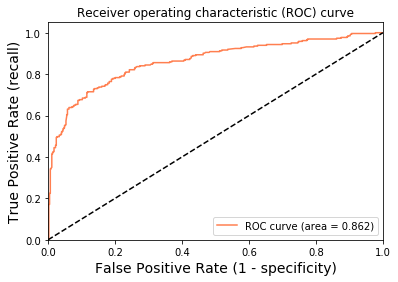

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


from sklearn.linear_model import LogisticRegression

# check classification scores of logistic regression
#logreg = LogisticRegression(C = 1e9, penalty='none',  )
logreg = LogisticRegression(penalty='none',random_state =0, max_iter=5000)###, solver = "lbfgs")
logreg.fit(x_train, y_train)

print_coeff(logreg, x_train.columns)
evaluate_model(model= logreg, X_train=x_train, Y_train=y_train, X_test=x_test, Y_test=y_test)

y_pred_train_proba = logreg.predict_proba(x_train)[:, 1]
show_performance(y_train, y_pred_train_proba, "train", True)

### By statsmodels

In [47]:

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

X = sm.add_constant(x_train) # adding a constant

sm_model = sm.Logit(y_train.values, X).fit()
sm_model_summary = sm_model.summary()
print(sm_model_summary)

sm_params = pd.DataFrame(
     {"feature": ["intecept"] +  list(x_train.columns), 
       "coef"  : sm_model.params.values
     },
     columns=['feature', 'coef'])

    
print(sm_params)

Optimization terminated successfully.
         Current function value: 0.433118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:                  0.3424
Time:                        03:33:42   Log-Likelihood:                -308.38
converged:                       True   LL-Null:                       -468.94
Covariance Type:            nonrobust   LLR p-value:                 8.562e-64
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7696      0.105     -7.330      0.000      -0.975      -0.564
Age            -0.3664    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### By Spark ML

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

#package to add PySpark to sys.path at runtime
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
import findspark
findspark.init() 

In [37]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext

globs = globals()
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
sc = spark.sparkContext

#import data from previuos session, x_train, x_test, y_train, y_test
xx_train =  x_train.copy()
xx_train["Y"] = y_train.values
xx_test =  x_test.copy()
xx_test["Y"] = y_test.values

x_train_sp = spark.createDataFrame(xx_train)
x_test_sp  = spark.createDataFrame(xx_test)

##### INPUT FOR SPARK
# Spark ML’s algorithms expect the data to be represented in two columns: Features and Labels. 
# 1. Features is an array of data points of all the features to be used for prediction. 
# 2. Labels contain the output label for each data point.

# To create a features array, import the VectorAssembler class and pass in a list of the feature column names.
from pyspark.ml.feature import VectorAssembler
feature_columns = x_train_sp.columns[:-1]   # do not include "Y" column (which is the last one)
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")
x_train_sp = assembler.transform(x_train_sp)
#x_train_sp["label"] = y_train.values
print(x_train_sp.show(5))

from pyspark.ml.classification import LogisticRegression
# Defining the algorithm variable. We need to specify the name of the features column and the labels column.
algorithm = LogisticRegression(featuresCol="features", labelCol="Y")

model_spark = algorithm.fit(x_train_sp)

print("Intercept", model_spark.intercept, "\n",
      "Coefficient: ", model_spark.coefficients)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

trainingSummary = model_spark.summary
trainingSummary.roc.show(5)
print("training AUC: " + str(trainingSummary.areaUnderROC))


+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+---+--------------------+
|                Age|                Fare|        TravelAlone|           Pclass_1|           Pclass_2|         Embarked_C|         Embarked_S|           Sex_male|           IsMinor|  Y|            features|
+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+---+--------------------+
| 0.8313779619514041|-0.09393818199614487| 0.8122029670431276| 1.7517338349679237|-0.5122610150282085|  1.986062547968831|-1.5357377920848783| 0.7424272739336898|-0.360775179521444|0.0|[0.83137796195140...|
|-1.9960847933129193|-0.32056162587296694|-1.2312193387332213|-0.5708629816003475|-0.5122610150282085|-0.5035088149780135| 0.6511528238439882|-1.3469332756346388| 2.7718093

### By Tensorflow

4709


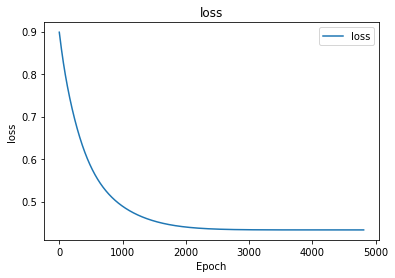

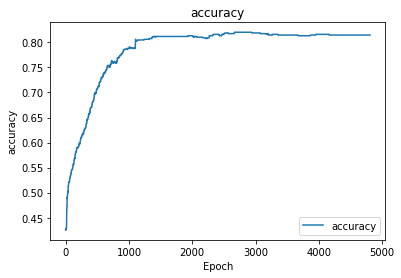

712/712 [==============================] - 0s 122us/sample - loss: 3.4393 - accuracy: 0.6419
[3.4393159459146223, 0.6418539]
train data loss:3.4393159459146223
train data accuracy:0.641853928565979
179/179 [==============================] - 0s 82us/sample - loss: 4.3368 - accuracy: 0.5754
[4.336811499888671, 0.575419]
train data loss:4.336811499888671
train data accuracy:0.575419008731842
------    On Training Dataset:
Sequential log_loss is 3.439
Sequential auc is 0.658
------    On Testing Dataset:
Sequential log_loss is 4.337
Sequential auc is 0.630
[[-0.365815  ]
 [ 0.03823755]
 [ 0.03817595]
 [ 1.002976  ]
 [ 0.58413446]
 [-0.02644793]
 [-0.250085  ]
 [-1.2851061 ]
 [ 0.19638142]]
Bias:  [-0.7694768]


In [7]:

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, regularizers
#from keras import regularizers
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
import numpy

widthX = x_train.shape[1]
model = Sequential([
      Dense(32, activation='relu', input_shape=(widthX,)),
      Dense(3, activation='relu'),
      #Dense(32, activation='relu'),
      #Dense(32, activation='relu'),
      #Dropout(0.5),
      Dense(1, use_bias=True, activation='sigmoid')
      ])

model = Sequential([
    Dense(1, input_shape=(widthX,), use_bias=True, activation='sigmoid')
   ])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
  
batch_sz = X_train.shape[0]
history = model.fit(
    x_train,
    y_train,
    epochs=10000,
    shuffle=False,
    verbose=0, batch_size=batch_sz, callbacks=[early_stop]
)

minepoch = np.argmin(history.history["loss"])
print(minepoch)

def plot_Tesor(history, ylabel):
  import matplotlib.pyplot as plt
  plt.clf()
  for k in history.keys():
    if k.endswith(ylabel):
      plt.plot(history[k], label=k)
  plt.title(ylabel)
  plt.ylabel(ylabel)
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

def model_sum(model, X, Y, Title="Train"):
  score = model.evaluate(X, Y)
  print(score)
  print("train data loss:{0}".format(score[0]))
  print("train data accuracy:{0}".format(score[1]))

plot_Tesor(history.history, "loss")
plot_Tesor(history.history, "accuracy")
model_sum(model, X_train, y_train, "Train")
model_sum(model, X_test,  y_test,  "Train")
evaluate_model(model, X_train, y_train, X_test, y_test)

for trainable_variable in model.trainable_weights:
    name = trainable_variable.name
    values =  trainable_variable.read_value().numpy()
    if ("/bias:" in name):
      print("Bias: ", values)
    else:
      print(values)
  
